# TD1 - Analyse en composantes principales

## 1.1 Chargement des données

In [1]:
mcdo_df <- read.csv("menu.csv")
summary(mcdo_df)

               Category                                       Item    
 Coffee & Tea      :95   1% Low Fat Milk Jug                    :  1  
 Breakfast         :42   Apple Slices                           :  1  
 Smoothies & Shakes:28   Bacon Buffalo Ranch McChicken          :  1  
 Beverages         :27   Bacon Cheddar McChicken                :  1  
 Chicken & Fish    :27   Bacon Clubhouse Burger                 :  1  
 Beef & Pork       :15   Bacon Clubhouse Crispy Chicken Sandwich:  1  
 (Other)           :26   (Other)                                :254  
       Serving.Size    Calories      Calories.from.Fat   Total.Fat      
 16 fl oz cup: 45   Min.   :   0.0   Min.   :   0.0    Min.   :  0.000  
 12 fl oz cup: 38   1st Qu.: 210.0   1st Qu.:  20.0    1st Qu.:  2.375  
 22 fl oz cup: 20   Median : 340.0   Median : 100.0    Median : 11.000  
 20 fl oz cup: 16   Mean   : 368.3   Mean   : 127.1    Mean   : 14.165  
 21 fl oz cup:  7   3rd Qu.: 500.0   3rd Qu.: 200.0    3rd Qu.: 22.

### 1: Justifiez l'utilisation du test du chi 2 sur ces données

Le test du chi 2 se fait sur des variables qualitatives. Puisque nous sommes en présence de variables quantitatives, je ne vois pas pourquoi on l'utiliserait ici.

### Quelles conditions devez-vous respecter pour utiliser un test du chi 2?

Il faut que les effectifs de chaque classe soient supérieurs à 5.

### Concluez sur l’indépendance des variables `Calories` et `Total.Fat`.


In [8]:
cor(mcdo_df$Calories, mcdo_df$Total.Fat) # We compute the correlation between `Calories` and `Total.Fat`

[1] 0.9044092

Les variables `Calories` et `Total.Fat` sont fortement corrélée linéairement.

In [3]:
cor_of_df <- function(df, fields_of_interest) {
  "
  Function that computes the correlation for each couple of columns in a dataframe
  and returns a matrix containing the results.
  
  The computation takes into account the fact that the matrix is symmetrical, and
  that a correlation on the same vectors is 1.
  "
  n <- length(fields_of_interest)
  
  # Initializing the matrix containing the chi square values.
  cor_matrix <- matrix(1,
                       ncol = n,
                       nrow = n,
                       dimnames = list(fields_of_interest, fields_of_interest))
  
  # Computing the Chi square values, and using the symmetry of the matrix.
  for (i in 1:(n - 1)) {
    for (j in (i + 1):n) {
      temp_cor <- cor(df[, fields_of_interest[i]],
                      df[, fields_of_interest[j]])
      
      cor_matrix[i, j] <- temp_cor
      cor_matrix[j, i] <- temp_cor
    }
  }
  
  return(cor_matrix)
}


# Name of the variables we are interested in computing the Chi square test.
fields_of_interest <- c("Calories", "Total.Fat",
                        "Cholesterol", "Sodium", "Sugars", "Protein")

# Compute the chi square matrix.
(correlation_data_frame <- cor_of_df(mcdo_df[fields_of_interest], fields_of_interest))

,Calories,Total.Fat,Cholesterol,Sodium,Sugars,Protein
Calories,1.0000000,0.9044092,0.5963992,0.7123087,0.2595981,0.7878475
Total.Fat,0.9044092,1.0000000,0.6805474,0.8461584,-0.1154457,0.8077730
Cholesterol,0.5963992,0.6805474,1.0000000,0.6243619,-0.1355183,0.5615614
Sodium,0.7123087,0.8461584,0.6243619,1.0000000,-0.4265355,0.8698016
Sugars,0.2595981,-0.1154457,-0.1355183,-0.4265355,1.0000000,-0.1799396
Protein,0.7878475,0.8077730,0.5615614,0.8698016,-0.1799396,1.0000000


In [4]:
# Same, but after scaling
(correlation_scaled_data_frame <- cor_of_df(scale(mcdo_df[fields_of_interest]), fields_of_interest))

,Calories,Total.Fat,Cholesterol,Sodium,Sugars,Protein
Calories,1.0000000,0.9044092,0.5963992,0.7123087,0.2595981,0.7878475
Total.Fat,0.9044092,1.0000000,0.6805474,0.8461584,-0.1154457,0.8077730
Cholesterol,0.5963992,0.6805474,1.0000000,0.6243619,-0.1355183,0.5615614
Sodium,0.7123087,0.8461584,0.6243619,1.0000000,-0.4265355,0.8698016
Sugars,0.2595981,-0.1154457,-0.1355183,-0.4265355,1.0000000,-0.1799396
Protein,0.7878475,0.8077730,0.5615614,0.8698016,-0.1799396,1.0000000


In [5]:
# Difference between the two
correlation_data_frame - correlation_scaled_data_frame

,Calories,Total.Fat,Cholesterol,Sodium,Sugars,Protein
Calories,0.000000e+00,0.000000e+00,-1.110223e-16,-1.110223e-16,0.000000e+00,1.110223e-16
Total.Fat,0.000000e+00,0.000000e+00,-1.110223e-16,0.000000e+00,-2.775558e-17,0.000000e+00
Cholesterol,-1.110223e-16,-1.110223e-16,0.000000e+00,0.000000e+00,0.000000e+00,-1.110223e-16
Sodium,-1.110223e-16,0.000000e+00,0.000000e+00,0.000000e+00,-1.110223e-16,0.000000e+00
Sugars,0.000000e+00,-2.775558e-17,0.000000e+00,-1.110223e-16,0.000000e+00,-2.775558e-17
Protein,1.110223e-16,0.000000e+00,-1.110223e-16,0.000000e+00,-2.775558e-17,0.000000e+00


## 1.2 Corrélation linéaire entre deux variables

### Déterminez deux groupes d’attributs qui présentent des corrélations linéaires entre eux (r > 0, 5).

In [6]:
correlation_data_frame>0.5

,Calories,Total.Fat,Cholesterol,Sodium,Sugars,Protein
Calories,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
Total.Fat,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
Cholesterol,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
Sodium,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
Sugars,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
Protein,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE


On peut remarquer que `Calories`, `Total.Fat`, `Cholesterol`, `Sodium` et `Protein` présentent un semblant de corrélation linéaire (r>0.5).

### 6. Justifiez l’utilisation d’une ACP.

Les variables sont quantitatives continues, donc il est possible faire une ACP. De plus, les variables sont corrélées, il est donc intéressant de faire une ACP afin de réduire les dimensions.

In [7]:
shapiro_of_df <- function(df, fields_of_interest) {
    "
    Function that computes the shapiro test's p value for each couple of columns in a dataframe
    and returns a matrix containing the results.

    The computation takes into account the fact that the matrix is symmetrical, and
    that a correlation on the same vectors is 1.
    "
    n <- length(fields_of_interest)

    # Initializing the matrix containing the chi square values.
    shapiro_array <- rep(NA, n)
    
    # Computing the Chi square values, and using the symmetry of the matrix.
    for (i in 1:n) {
        shapiro_array[i] <- shapiro.test(df[, fields_of_interest[i]])$p.value
    }

    return(shapiro_array)
}

(shapiro_of_df(mcdo_df, fields_of_interest)<0.05)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

### 7. Expliquez les différences obtenues entre une ACP normée et non normée ?

D'après le test de Shapiro, les variables ne suivent pas une loi normale, donc on ne peut pas le centrer réduire et on ne peut normalement pas faire d'ACP.

## 1.3 Représentation en trois dimensions


In [8]:
library(rgl)

plot3d(mcdo_df$Calories,
       mcdo_df$Total.Fat,
       mcdo_df$Cholesterol,
       type="s")

In [ ]:
# We scale the sub data frame we want to focus on.
interesting_df <- scale(mcdo_df[, c("Calories", "Total.Fat", "Cholesterol")])

lims <- c(min(interesting_df),
          max(interesting_df))

plot3d(interesting_df,
       type = "s")

In [10]:
plot3d(ellipse3d(cor(cbind(interesting_df$Calories,
                           interesting_df$Total.Fat,
                           interesting_df$Cholesterol))), col="grey",add=TRUE)

## 1.4 Analyse en Composantes Principales


In [9]:
library(ade4)
list <- c("Calories", "Total.Fat", "Cholesterol")
(acp <- dudi.pca(mcdo_df[, list],
                center=TRUE,
                scale=TRUE,
                scannf = FALSE,
                nf = 3))

Duality diagramm
class: pca dudi
$call: dudi.pca(df = mcdo_df[, list], center = TRUE, scale = TRUE, scannf = FALSE, 
    nf = 3)

$nf: 3 axis-components saved
$rank: 3
eigen values: 2.462 0.4496 0.08795
  vector length mode    content       
1 $cw    3      numeric column weights
2 $lw    260    numeric row weights   
3 $eig   3      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       260  3    modified array      
2 $li        260  3    row coordinates     
3 $l1        260  3    row normed scores   
4 $co        3    3    column coordinates  
5 $c1        3    3    column normed scores
other elements: cent norm 

In [10]:
names(acp)

[1] "tab"  "cw"   "lw"   "eig"  "rank" "nf"   "c1"   "li"   "co"   "l1"  
[11] "call" "cent" "norm"

### 12. Que contient le dataframe tab ?

D'après la doc: `tab`: The data frame to be analyzed depending of the transformation arguments (center and scale)

## 1.5 Informations associées à une ACP

### 15. Quel pourcentage de l’inertie total avec 3 axes ?


In [11]:
pve <- 100 * acp$eig / sum(acp$eig) # On calcule le pourcentage d'intertie de chaque vecteur propre.
cumsum(pve)

[1]  82.08206  97.06841 100.00000

Les trois vecteurs ont une inertie de 100%.

### 16. Cherchez la signification du vecteur rank.
### 17. Cherchez la signification du vecteur nf.
### 18. Cherchez la signification du vecteur c1.
### 19. Cherchez la signification du vecteur l1.
### 20. Cherchez la signification du vecteur co.
### 21. Cherchez la signification de l’objet call.
### 22. Cherchez la signification du vecteur cent.
### 23. Cherchez la signification du vecteur norm.

In [14]:
help(dudi.pca)

### 24. Donnez le nombre de facteurs retenus.

Une inertie de 97% étant très satisfaisante, on peut tout à fait ne retenir que les deux premiers vecteurs.

## 1.6 Analyse des variables


In [12]:
(inertie <-inertia.dudi(acp, col.inertia=TRUE))

Inertia information:
Call: inertia.dudi(x = acp, col.inertia = TRUE)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1 2.46246   2.462   82.08
Ax2 0.44959   2.912   97.07
Ax3 0.08795   3.000  100.00

Column contributions (%):
   Calories   Total.Fat Cholesterol 
      33.33       33.33       33.33 

Column absolute contributions (%):
            Axis1(%) Axis2(%) Axis3(%)
Calories       35.06   22.006   42.935
Total.Fat      37.31    7.245   55.448
Cholesterol    27.63   70.748    1.617

Signed column relative contributions:
              Axis1   Axis2   Axis3
Calories      86.33   9.894  3.7760
Total.Fat     91.87   3.257 -4.8765
Cholesterol   68.05 -31.808  0.1422

Cumulative sum of column relative contributions (%):
              Axis1 Axis1:2 Axis1:3    Axis4:3
Calories      86.33   96.22     100  0.000e+00
Total.Fat     91.87   95.12     100 -1.776e-13
Cholesterol   68.05   99.86     100  6.661e-14

,Comp1,Comp2,Comp3
Calories,0.93,0.31,0.19
Total.Fat,0.96,0.18,-0.22
Cholesterol,0.82,-0.56,0.04


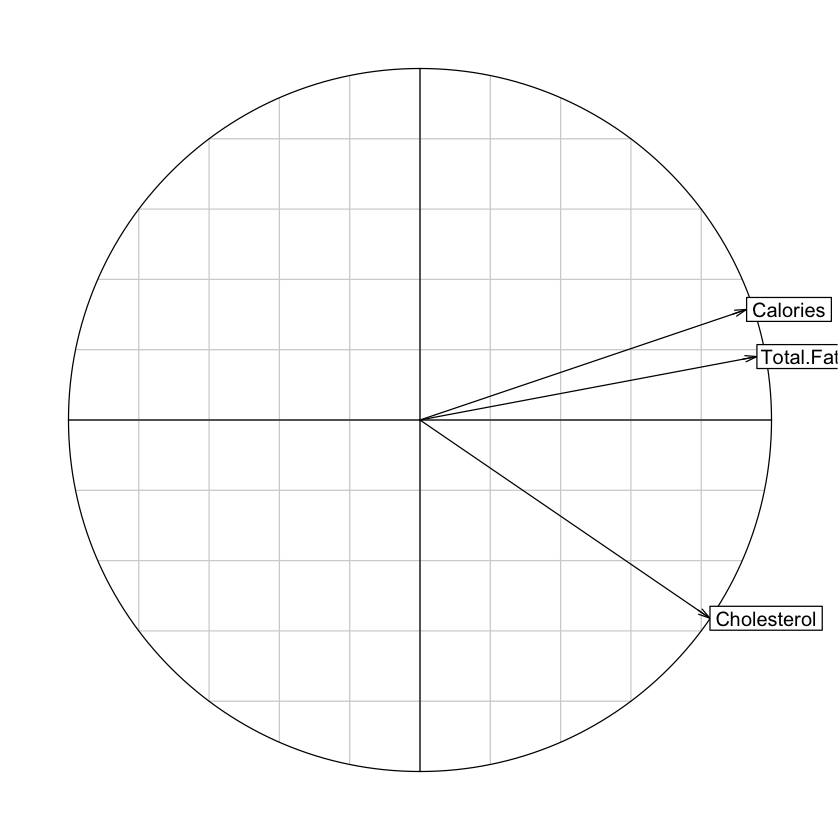

In [13]:
round(acp$co ,2)
s.corcircle(acp$co,
            xax=1,
            yax=2)

### 25. Comment reconnaissez-vous sur la figure qu’un attribut est bien représenté ?

On reconnait qu'un attribut est bien représenté en regardant sa projection sur les axes.

### 26. Quel est l’attribut le moins bien représenté dans le cercle? Justifiez votre réponse.

L'attribut `Total.Fat` est le mieux représenté.

###  27. À l’aide de la figure précédente (figure 4), précisez l’attribut le plus corrélé positivement à Calorie ?

Calories et Total.Fat semblent être correllées d'après la figure précédente.

### 28. Quels sont les attributs qui ont contribué à l’axe F1 ? Justifiez votre réponse.

Toujours en projetant, on peut remarque que Total.Fat et Calories ont beaucoup contribué à l'axe F1 (horizontal).

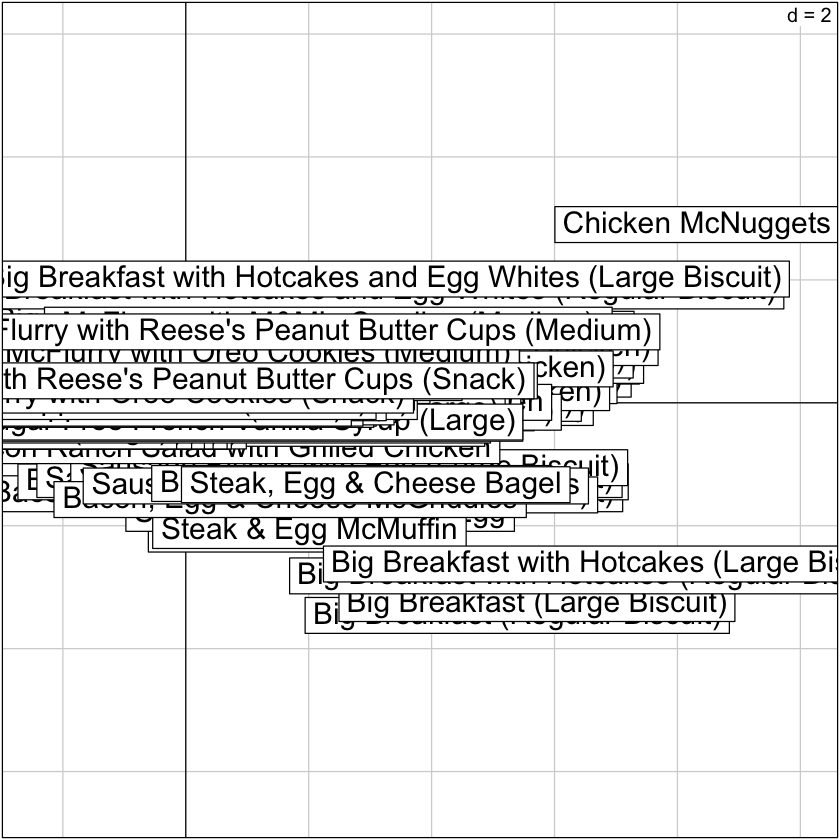

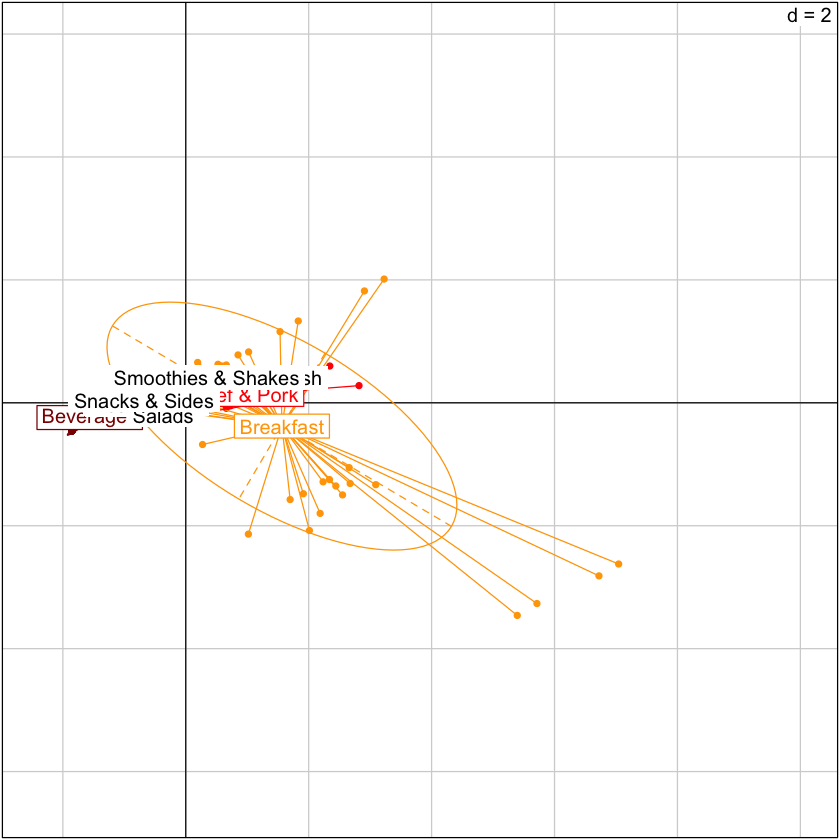

In [14]:
options(warn=-1)
s.label(acp$li,
        xax = 1,
        yax = 2,
        label=as.character(mcdo_df$Item),
        clabel=1.5)

gcol <- c("red1", "red4","orange")
s.class(dfxy = acp$li, fac = mcdo_df$Category, col = gcol, xax =
1, yax = 2)



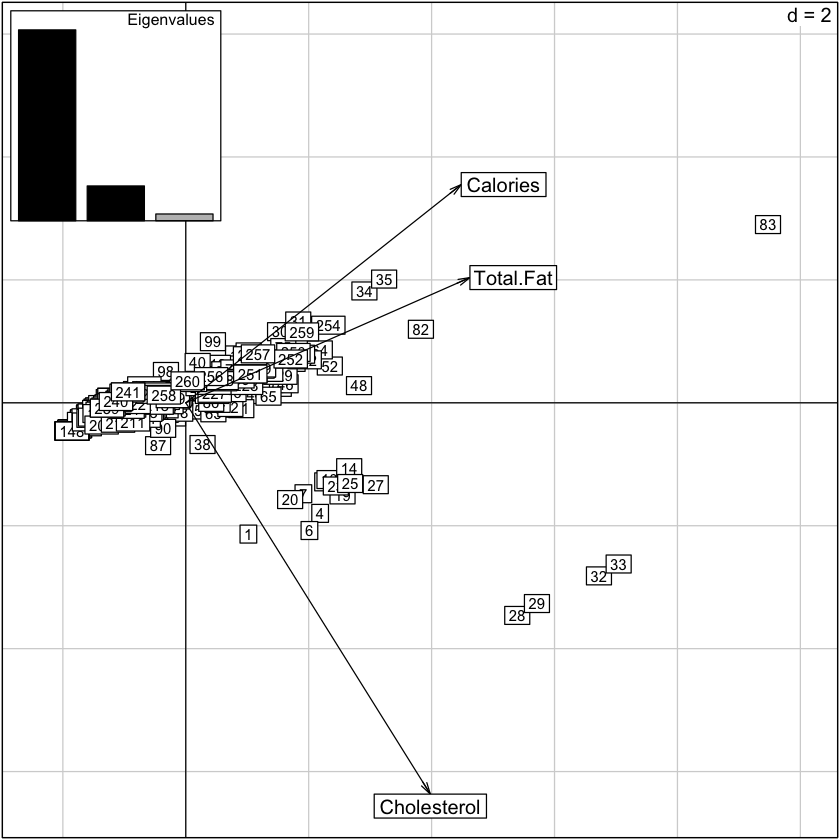

In [15]:
scatter(acp)

In [16]:
list <- c("Calories", "Total.Fat", "Cholesterol", "Sodium", "Sugars", "Protein")
(acp <- dudi.pca(mcdo_df[, list],
                center=TRUE,
                scale=TRUE,
                scannf = FALSE,
                nf = 3))
(inertie <-inertia.dudi(acp, col.inertia=TRUE))

Duality diagramm
class: pca dudi
$call: dudi.pca(df = mcdo_df[, list], center = TRUE, scale = TRUE, scannf = FALSE, 
    nf = 3)

$nf: 3 axis-components saved
$rank: 6
eigen values: 4 1.235 0.5039 0.1844 0.06727 ...
  vector length mode    content       
1 $cw    6      numeric column weights
2 $lw    260    numeric row weights   
3 $eig   6      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       260  6    modified array      
2 $li        260  3    row coordinates     
3 $l1        260  3    row normed scores   
4 $co        6    3    column coordinates  
5 $c1        6    3    column normed scores
other elements: cent norm 

Inertia information:
Call: inertia.dudi(x = acp, col.inertia = TRUE)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1 4.00005   4.000   66.67
Ax2 1.23452   5.235   87.24
Ax3 0.50390   5.738   95.64
Ax4 0.18437   5.923   98.71
Ax5 0.06727   5.990   99.84
Ax6 0.00989   6.000  100.00

Column contributions (%):
   Calories   Total.Fat Cholesterol      Sodium      Sugars     Protein 
      16.67       16.67       16.67       16.67       16.67       16.67 

Column absolute contributions (%):
            Axis1(%)  Axis2(%) Axis3(%)
Calories     19.5173 15.693944  2.10580
Total.Fat    22.7493  0.577005  0.27727
Cholesterol  14.5944  0.008067 80.96811
Sodium       21.5301  6.195388  3.72201
Sugars        0.8226 77.450419  0.01767
Protein      20.7862  0.075177 12.90914

Signed column relative contributions:
              Axis1     Axis2     Axis3
Calories    -78.070 19.374458 -1.061114
Total.Fat   -90.998  0.712323 -0.139716
Cholesterol -58.379 -0.009959 40.799796
Sodium      -8

On remarque que deux axes contiennent maintenant plus de 99% de l'inertie. On gagne en représentation de l'information ce que l'on perd en interprétation.

,Comp1,Comp2,Comp3
Calories,-0.88,0.44,-0.10
Total.Fat,-0.95,0.08,-0.04
Cholesterol,-0.76,-0.01,0.64
Sodium,-0.93,-0.28,-0.14
Sugars,0.18,0.98,0.01
Protein,-0.91,-0.03,-0.26


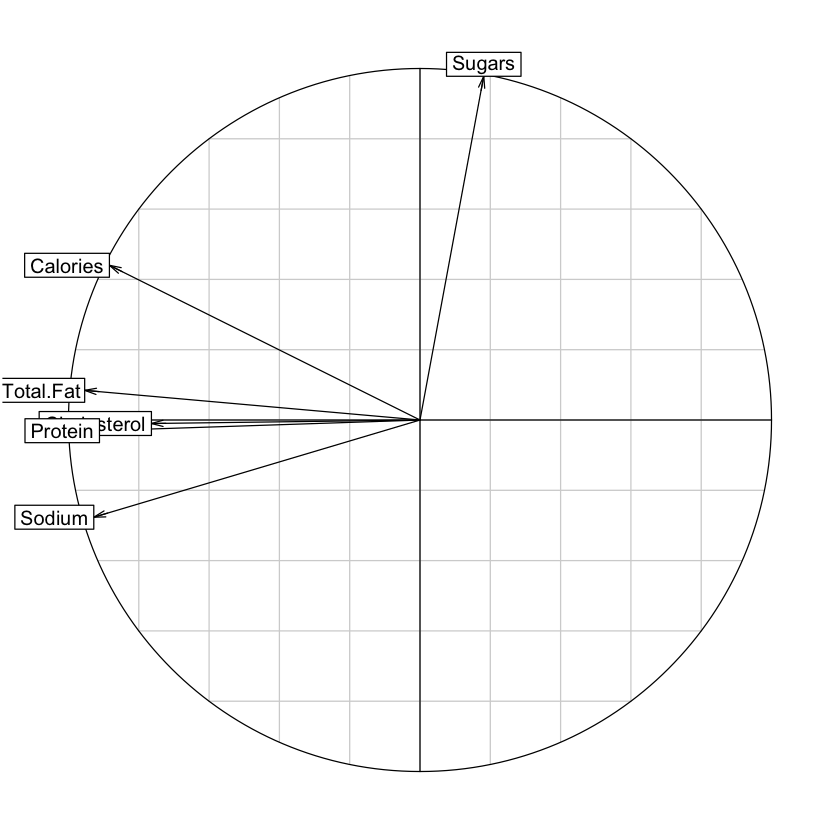

In [17]:
round(acp$co ,2)
s.corcircle(acp$co,
            xax=1,
            yax=2)